In [1]:
import mlrose_hiive
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from mlrose_hiive import KnapsackGenerator
from mlrose_hiive import RHCRunner, SARunner, GARunner, MIMICRunner

In [2]:
seeds = [123456, 65536, 893496213, 202420304, 77213]
prob_sizes = [10, 50, 100]

#### Randomized Hill Climbing

In [3]:
dict_dfs_rhc = {}

restartList = [9, 24, 49]

start_time = time.time()
for prob_size in prob_sizes:
    if prob_size not in dict_dfs_rhc:
        dict_dfs_rhc[prob_size] = {}

    for restart in restartList:
        list_dfs_rhc = []

        for seed in seeds:
            problem = KnapsackGenerator().generate(seed=seed, number_of_items_types=prob_size)
            rhc = RHCRunner(problem=problem,
                            experiment_name='rhc',
                            output_directory=None,
                            seed=seed,
                            iteration_list=np.arange(2000/(restart+1)),
                            max_attempts=100,
                            restart_list=[restart])
            
            df_run_stats, df_run_curves = rhc.run()
            selected_cols = ['Fitness', 'FEvals', 'Time']
            df_run_stats['Fitness'] = df_run_stats['Fitness'].cummax()
            list_dfs_rhc.append(df_run_stats[selected_cols])

        dict_dfs_rhc[prob_size][restart] = pd.concat(list_dfs_rhc).groupby(level=0).mean()
        
end_time = time.time()
time_elapsed = end_time - start_time

print(f'Time elapsed: {time_elapsed} seconds')

Time elapsed: 224.29577946662903 seconds


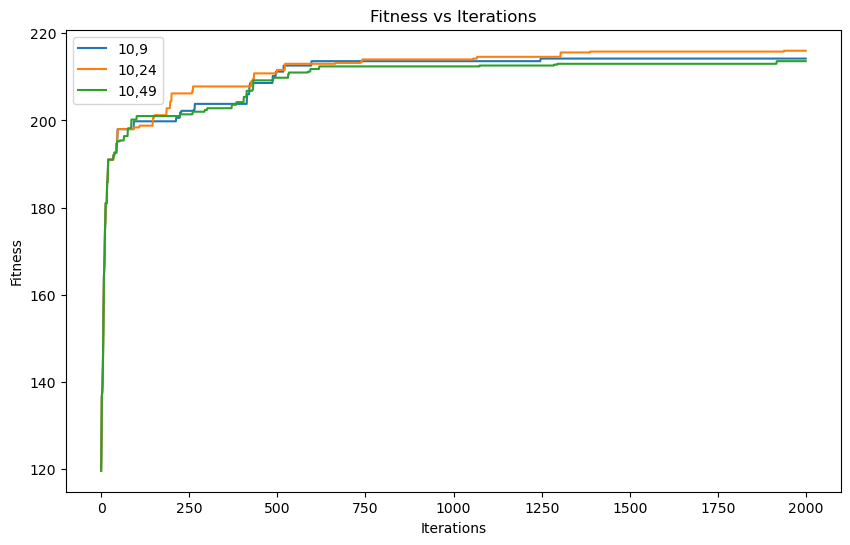

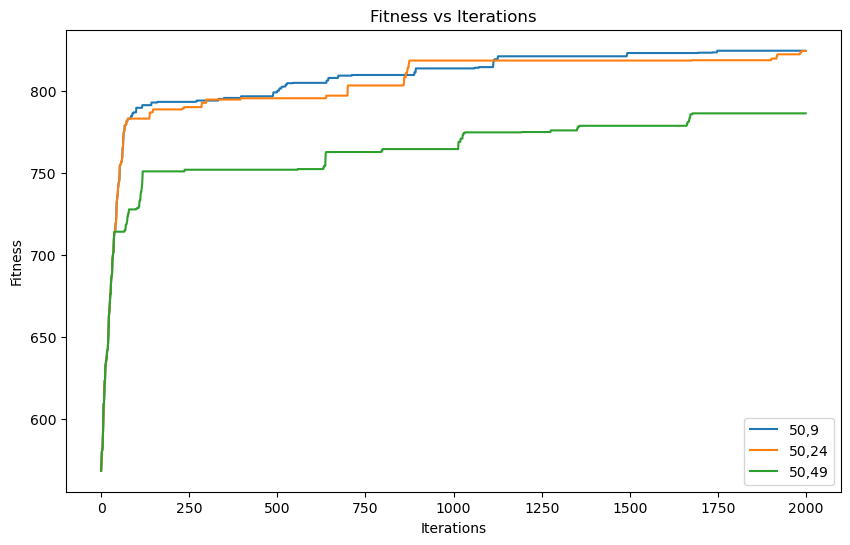

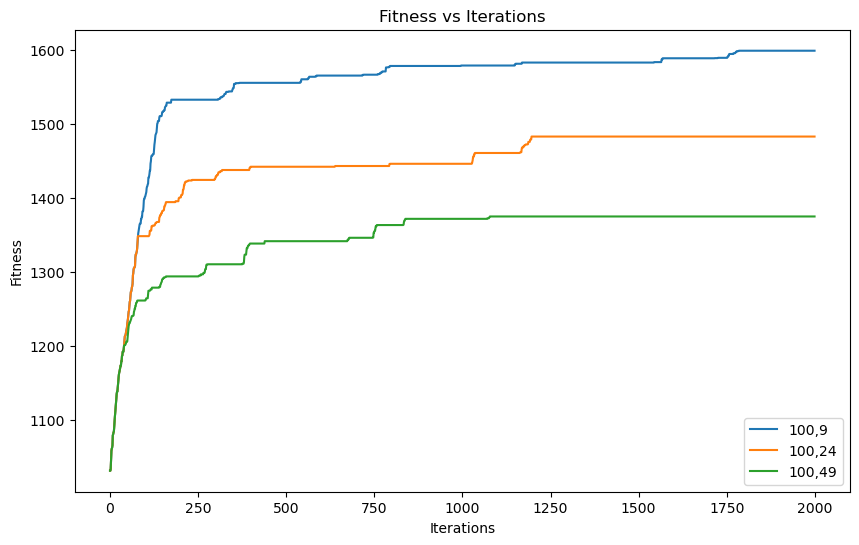

In [4]:
# Plot Fitness vs Iterations
for prob_size in prob_sizes:
    plt.figure(figsize=(10, 6))
    for restart in restartList:
        plt.plot(dict_dfs_rhc[prob_size][restart].index,
                 dict_dfs_rhc[prob_size][restart]['Fitness'],
                 label=f"{prob_size},{restart}")
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Fitness vs Iterations')
    plt.legend()
    plt.show()

Small size (10): 99
Medium size (20): 9
Large size (30): 9

#### Simulated Annealing

In [5]:
dict_dfs_sa = {}

decayList = [mlrose_hiive.ExpDecay, mlrose_hiive.GeomDecay, mlrose_hiive.ArithDecay]
# decayList = [mlrose_hiive.GeomDecay]
tempList = [0.1, 1, 10, 100]

start_time = time.time()
for prob_size in prob_sizes:
    if prob_size not in dict_dfs_sa:
        dict_dfs_sa[prob_size] = {}

    for decay_model in decayList:
        if decay_model not in dict_dfs_sa[prob_size]:
            dict_dfs_sa[prob_size][decay_model] = {}
            
        for temp in tempList:
            list_dfs_sa = []
                
            for seed in seeds:
                problem = KnapsackGenerator().generate(seed=seed, number_of_items_types=prob_size)
                sa = SARunner(problem,
                              experiment_name='sa',
                              output_directory=None,
                              seed=seed,
                              iteration_list=np.arange(2000),
                              max_attempts=100,
                              temperature_list=[temp],
                              decay_list=[decay_model])
                
                df_run_stats, df_run_curves = sa.run()
                selected_cols = ['Fitness', 'FEvals', 'Time']
                list_dfs_sa.append(df_run_stats[selected_cols])
    
            dict_dfs_sa[prob_size][decay_model][temp] = pd.concat(list_dfs_sa).groupby(level=0).mean()

end_time = time.time()
time_elapsed = end_time - start_time

print(f'Time elapsed: {time_elapsed} seconds')

Time elapsed: 390.6764669418335 seconds


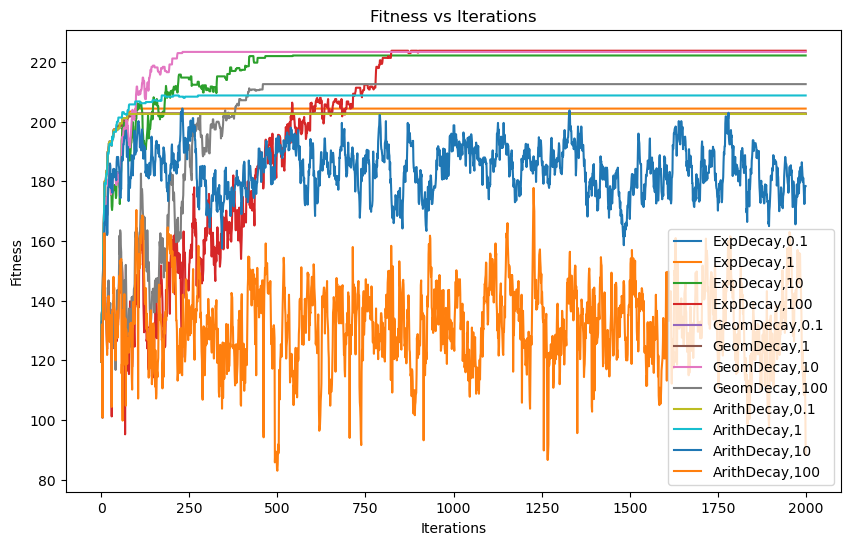

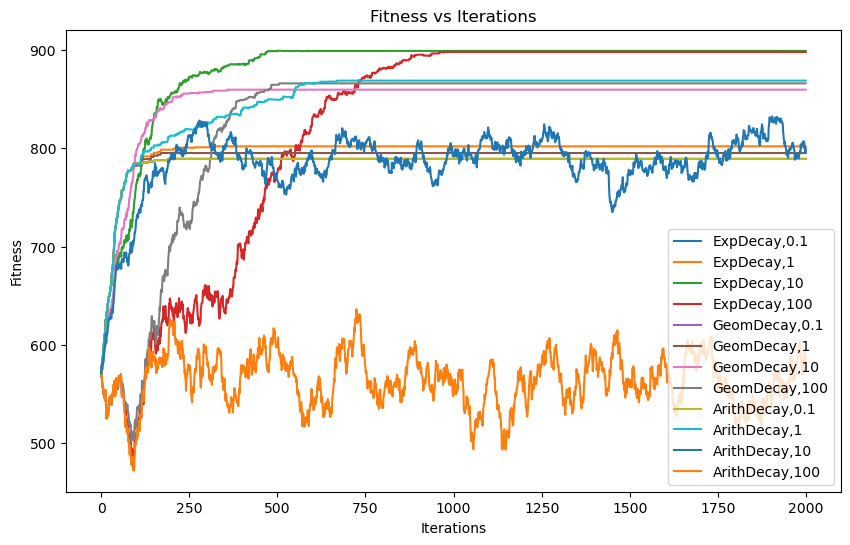

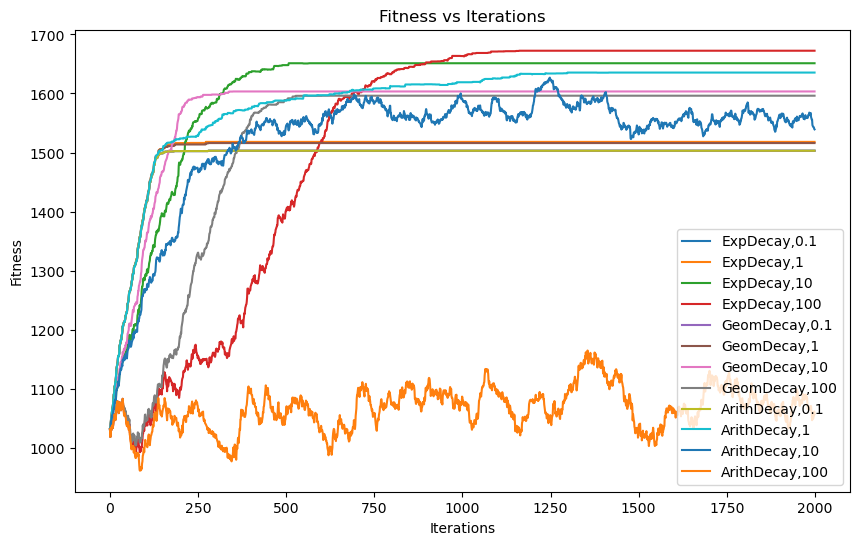

In [6]:
# Plot Fitness vs Iterations
legendList = ['ExpDecay', 'GeomDecay', 'ArithDecay']
for prob_size in prob_sizes:
    plt.figure(figsize=(10, 6))
    for idx in range(len(decayList)):
        for temp in tempList:
            plt.plot(dict_dfs_sa[prob_size][decayList[idx]][temp].index,
                     dict_dfs_sa[prob_size][decayList[idx]][temp]['Fitness'],
                     label=f"{legendList[idx]},{temp}")
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Fitness vs Iterations')
    plt.legend()
    plt.show()

#### Genetic Algorithm

In [7]:
dict_dfs_ga = {}

pop_sizeList = [25, 100, 200]
mut_rateList = [0.1, 0.2, 0.3]

start_time = time.time()
for prob_size in prob_sizes:
    if prob_size not in dict_dfs_ga:
        dict_dfs_ga[prob_size] = {}

    for pop_size in pop_sizeList:
        if pop_size not in dict_dfs_ga[prob_size]:
            dict_dfs_ga[prob_size][pop_size] = {}
            
        for mut_rate in mut_rateList:
            list_dfs_ga = []
                
            for seed in seeds:
                problem = KnapsackGenerator().generate(seed=seed, number_of_items_types=prob_size)
                ga = GARunner(problem,
                              experiment_name='ga',
                              output_directory=None,
                              seed=seed,
                              iteration_list=np.arange(2000),
                              max_attempts=100,
                              population_sizes=[pop_size],
                              mutation_rates=[mut_rate])
                
                df_run_stats, df_run_curves = ga.run()
                selected_cols = ['Fitness', 'FEvals', 'Time']
                list_dfs_ga.append(df_run_stats[selected_cols])
    
            dict_dfs_ga[prob_size][pop_size][mut_rate] = pd.concat(list_dfs_ga).groupby(level=0).mean()

end_time = time.time()
time_elapsed = end_time - start_time

print(f'Time elapsed: {time_elapsed} seconds')

Time elapsed: 153.27891635894775 seconds


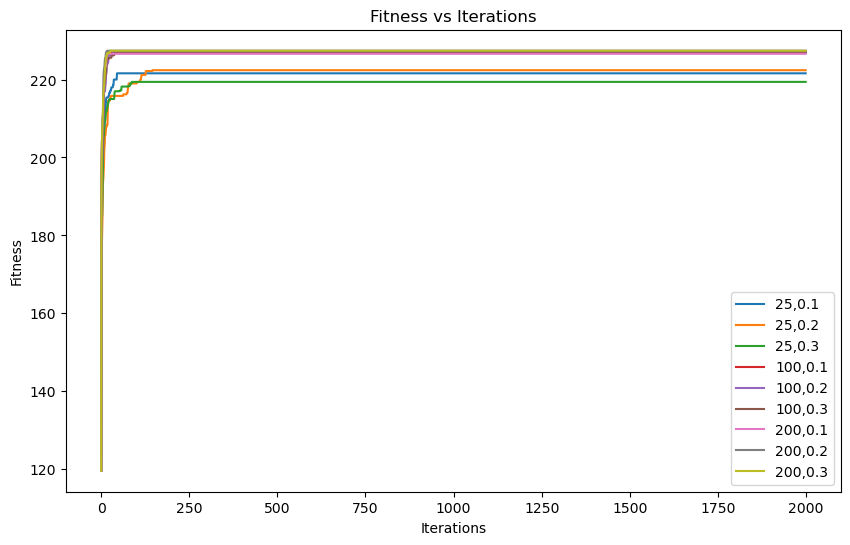

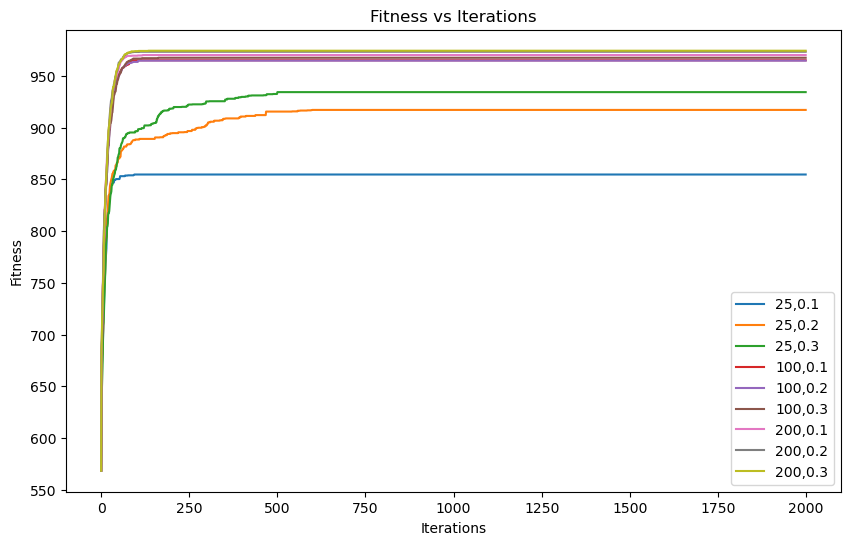

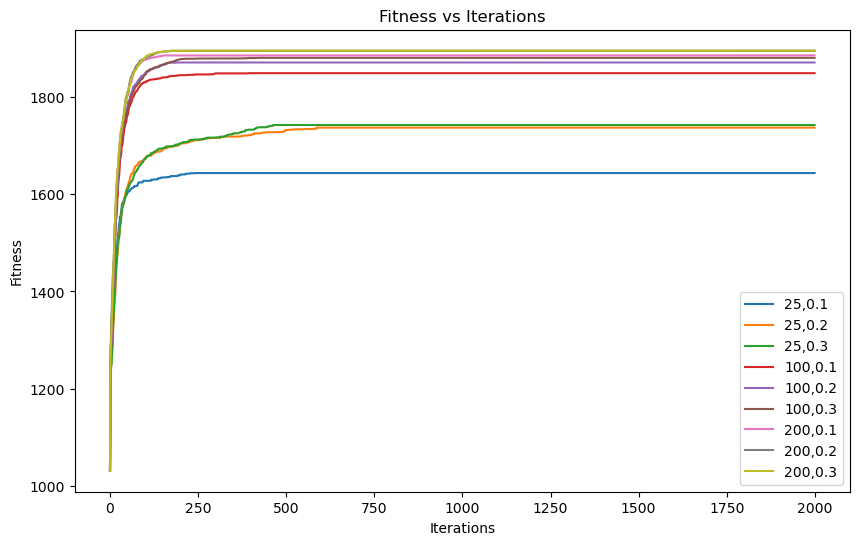

In [8]:
# Plot Fitness vs Iterations
for prob_size in prob_sizes:
    plt.figure(figsize=(10, 6))
    for pop_size in pop_sizeList:
        for mut_rate in mut_rateList:
            plt.plot(dict_dfs_ga[prob_size][pop_size][mut_rate].index,
                     dict_dfs_ga[prob_size][pop_size][mut_rate]['Fitness'],
                     label=f"{pop_size},{mut_rate}")
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Fitness vs Iterations')
    plt.legend()
    plt.show()

Large: 250, 0.2

#### MIMIC

In [9]:
dict_dfs_mimic = {}

popList = [25, 100, 200]
keepList = [0.3, 0.35, 0.4, 0.5]

start_time = time.time()
for prob_size in prob_sizes:
    if prob_size not in dict_dfs_mimic:
        dict_dfs_mimic[prob_size] = {}

    for pop_size in popList:
        if pop_size not in dict_dfs_mimic[prob_size]:
            dict_dfs_mimic[prob_size][pop_size] = {}

        for keep_per in keepList:
            list_dfs_mimic = []

            for seed in seeds:
                problem = KnapsackGenerator().generate(seed=seed, number_of_items_types=prob_size)
                mimic = MIMICRunner(problem,
                                    experiment_name='mimic',
                                    output_directory=None,
                                    seed=seed,
                                    iteration_list=np.arange(2000),
                                    max_attempts=100,
                                    use_fast_mimic=True,
                                    population_sizes=[pop_size],
                                    keep_percent_list=[keep_per])

                df_run_stats, df_run_curves = mimic.run()
                selected_cols = ['Fitness', 'FEvals', 'Time']
                list_dfs_mimic.append(df_run_stats[selected_cols])

            dict_dfs_mimic[prob_size][pop_size][keep_per] = pd.concat(list_dfs_mimic).groupby(level=0).mean()

end_time = time.time()
time_elapsed = end_time - start_time

print(f'Time elapsed: {time_elapsed} seconds')

Time elapsed: 585.202211856842 seconds


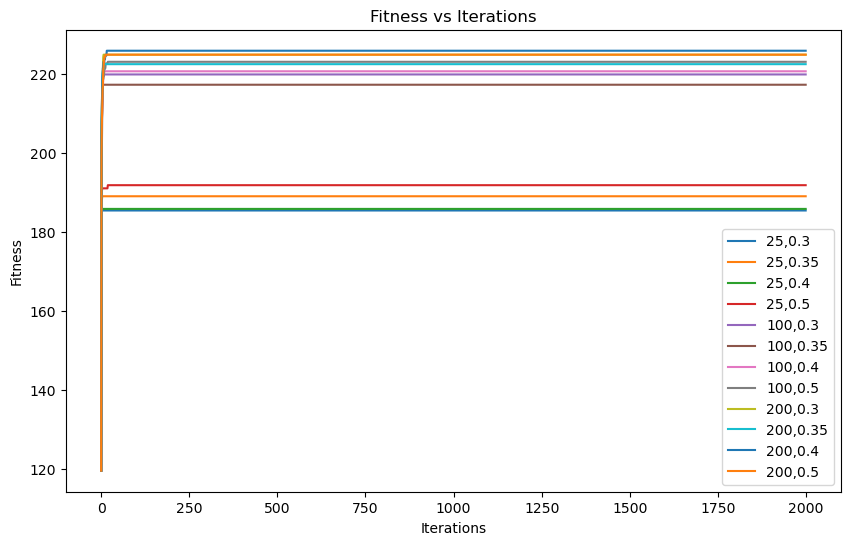

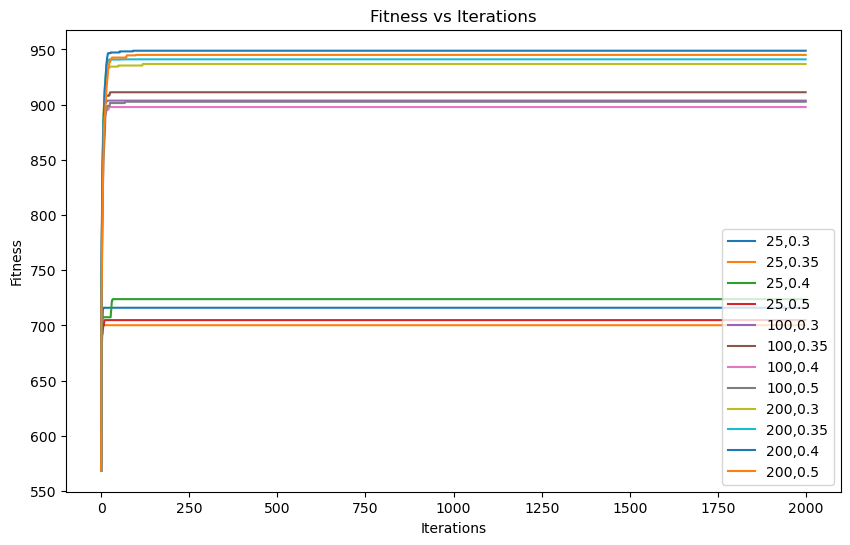

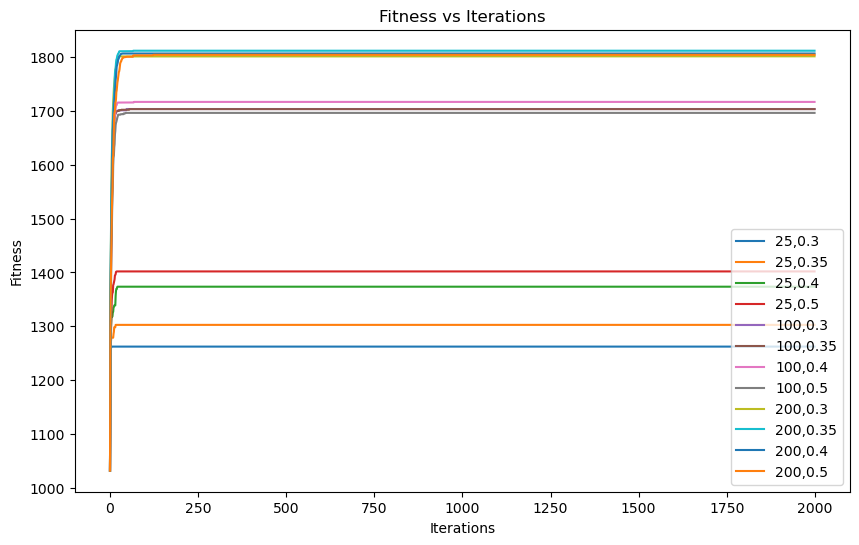

In [10]:
# Plot Fitness vs Iterations
for prob_size in prob_sizes:
    plt.figure(figsize=(10, 6))
    for pop_size in popList:
        for keep_per in keepList:
            plt.plot(dict_dfs_mimic[prob_size][pop_size][keep_per].index,
                     dict_dfs_mimic[prob_size][pop_size][keep_per]['Fitness'],
                     label=f"{pop_size},{keep_per}")
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Fitness vs Iterations')
    plt.legend()
    plt.show()

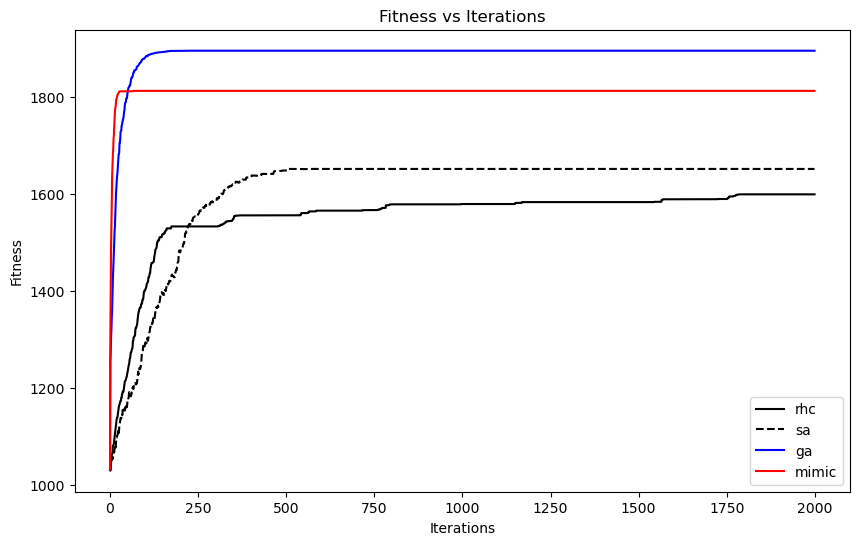

In [11]:
# Plot
plt.figure(figsize=(10, 6))
# RHC
plt.plot(dict_dfs_rhc[100][9].index,
         dict_dfs_rhc[100][9]['Fitness'],
         label="rhc", linestyle='-', color='black')
# SA
plt.plot(dict_dfs_sa[100][mlrose_hiive.ExpDecay][10].index,
         dict_dfs_sa[100][mlrose_hiive.ExpDecay][10]['Fitness'],
         label="sa", linestyle='--', color='black')
# GA
plt.plot(dict_dfs_ga[100][200][0.3].index,
         dict_dfs_ga[100][200][0.3]['Fitness'],
         label="ga", linestyle='-', color='blue')
# MIMIC
plt.plot(dict_dfs_mimic[100][200][0.35].index,
         dict_dfs_mimic[100][200][0.35]['Fitness'],
         label="mimic", linestyle='-', color='red')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Fitness vs Iterations')
plt.legend()
plt.savefig('/home/zsang/Documents/OSMCS/CS 7641/Projects/p2/plots/Knapsack_fitness_vs_iter')
plt.show()

{10: {'rhc': 216.0, 'sa': 223.8, 'ga': 227.4, 'mimic': 225.8}, 50: {'rhc': 824.6, 'sa': 899.2, 'ga': 974.2, 'mimic': 948.8}, 100: {'rhc': 1598.8, 'sa': 1672.4, 'ga': 1895.0, 'mimic': 1812.2}}


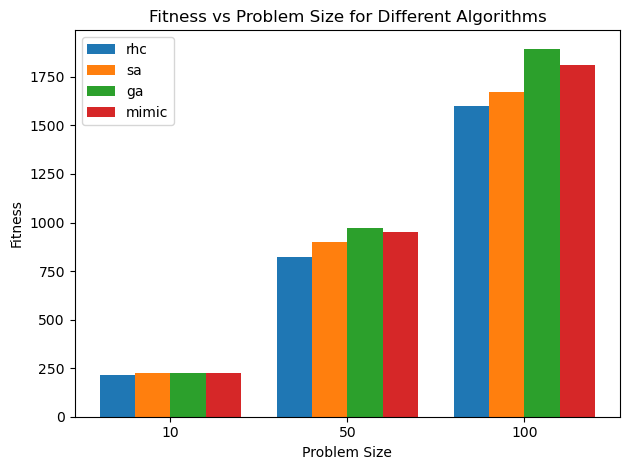

In [13]:
dict_max_fit = {}

for prob_size in prob_sizes:
    if prob_size not in dict_max_fit:
        dict_max_fit[prob_size] = {}
    dict_max_fit[prob_size]['rhc'] = max([df['Fitness'].max() for df in dict_dfs_rhc[prob_size].values()])
    dict_max_fit[prob_size]['sa'] = max([max([df['Fitness'].max() for df in dict_dfs_sa[prob_size][decay_model].values()]) for decay_model in decayList])
    dict_max_fit[prob_size]['ga'] = max([max([df['Fitness'].max() for df in dict_dfs_ga[prob_size][pop_size].values()]) for pop_size in pop_sizeList])
    dict_max_fit[prob_size]['mimic'] = max([max([df['Fitness'].max() for df in dict_dfs_mimic[prob_size][pop].values()]) for pop in popList])

print(dict_max_fit)

# Extracting data for plotting
x_labels = list(dict_max_fit.keys())
rhc_values = [dict_max_fit[key]['rhc'] for key in x_labels]
sa_values = [dict_max_fit[key]['sa'] for key in x_labels]
ga_values = [dict_max_fit[key]['ga'] for key in x_labels]
mimic_values = [dict_max_fit[key]['mimic'] for key in x_labels]

# Plotting
bar_width = 0.2
index = range(len(x_labels))
plt.bar(index, rhc_values, bar_width, label='rhc')
plt.bar([i + bar_width for i in index], sa_values, bar_width, label='sa')
plt.bar([i + 2*bar_width for i in index], ga_values, bar_width, label='ga')
plt.bar([i + 3*bar_width for i in index], mimic_values, bar_width, label='mimic')

plt.xlabel('Problem Size')
plt.ylabel('Fitness')
plt.title('Fitness vs Problem Size for Different Algorithms')
plt.xticks([i + 1.5 * bar_width for i in index], x_labels)
plt.legend()
plt.tight_layout()
plt.savefig('/home/zsang/Documents/OSMCS/CS 7641/Projects/p2/plots/Knapsack_fitness_vs_prob_size')
plt.show()

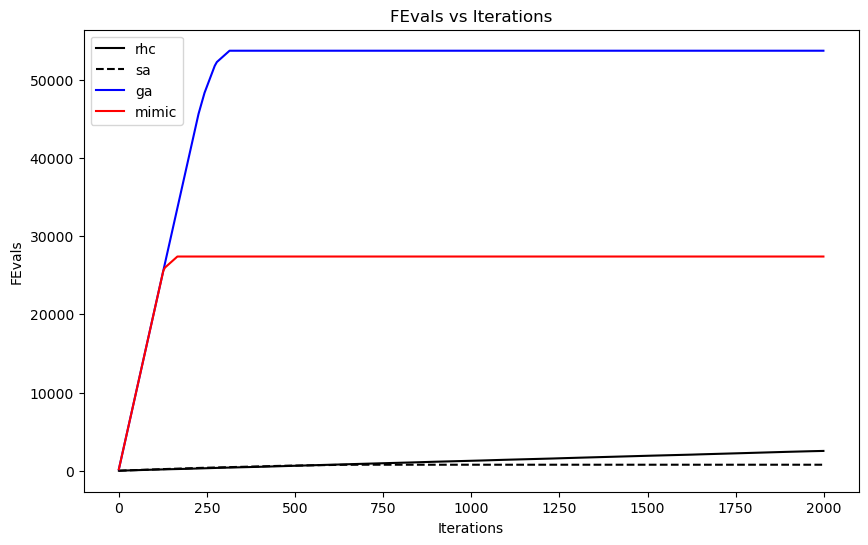

In [14]:
# Plot
plt.figure(figsize=(10, 6))
# RHC
plt.plot(dict_dfs_rhc[100][9].index,
         dict_dfs_rhc[100][9]['FEvals'],
         label="rhc", linestyle='-', color='black')
# SA
plt.plot(dict_dfs_sa[100][mlrose_hiive.ExpDecay][10].index,
         dict_dfs_sa[100][mlrose_hiive.ExpDecay][10]['FEvals'],
         label="sa", linestyle='--', color='black')
# GA
plt.plot(dict_dfs_ga[100][200][0.3].index,
         dict_dfs_ga[100][200][0.3]['FEvals'],
         label="ga", linestyle='-', color='blue')
# MIMIC
plt.plot(dict_dfs_mimic[100][200][0.35].index,
         dict_dfs_mimic[100][200][0.35]['FEvals'],
         label="mimic", linestyle='-', color='red')
plt.xlabel('Iterations')
plt.ylabel('FEvals')
plt.title('FEvals vs Iterations')
plt.legend()
plt.savefig('/home/zsang/Documents/OSMCS/CS 7641/Projects/p2/plots/Knapsack_fevals_vs_iter')
plt.show()

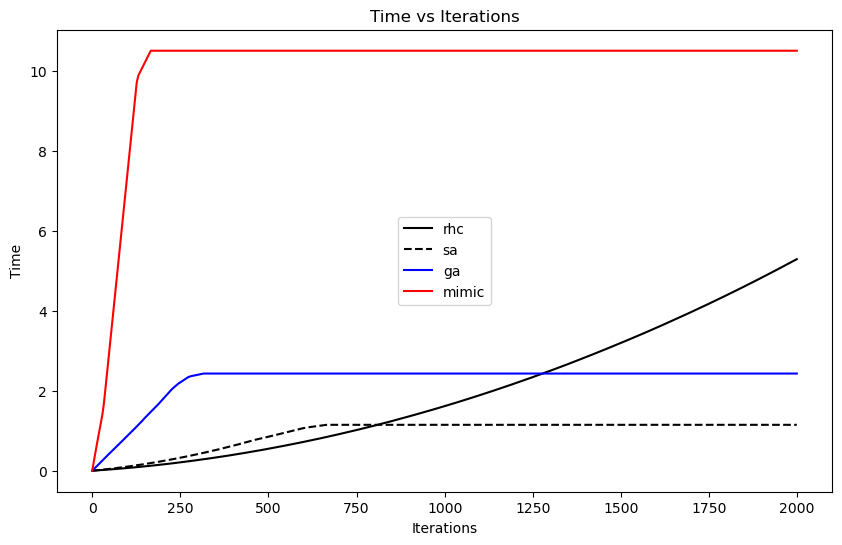

In [15]:
# Plot
plt.figure(figsize=(10, 6))
# RHC
plt.plot(dict_dfs_rhc[100][9].index,
         dict_dfs_rhc[100][9]['Time'],
         label="rhc", linestyle='-', color='black')
# SA
plt.plot(dict_dfs_sa[100][mlrose_hiive.ExpDecay][10].index,
         dict_dfs_sa[100][mlrose_hiive.ExpDecay][10]['Time'],
         label="sa", linestyle='--', color='black')
# GA
plt.plot(dict_dfs_ga[100][200][0.3].index,
         dict_dfs_ga[100][200][0.3]['Time'],
         label="ga", linestyle='-', color='blue')
# MIMIC
plt.plot(dict_dfs_mimic[100][200][0.35].index,
         dict_dfs_mimic[100][200][0.35]['Time'],
         label="mimic", linestyle='-', color='red')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Time vs Iterations')
plt.legend()
plt.savefig('/home/zsang/Documents/OSMCS/CS 7641/Projects/p2/plots/Knapsack_time_vs_iter')
plt.show()